# <a id='toc1_'></a>[Tarea realizada por Carlos Sánchez Polo y Jesús Martínez Leal](#toc0_)
Última edición: 01/03/2024

**Table of contents**<a id='toc0_'></a>    
 
  - [Ejemplo inicial](#toc1_1_)    
      - [Cargar datos](#toc1_1_1_1_)    
      - [Crear train/test split](#toc1_1_1_2_)    
      - [Run t-SNE](#toc1_1_1_3_)    
      - [Transformación](#toc1_1_1_4_)    
      - [Todo junto](#toc1_1_1_5_)    
  - [Ejercicios con OpenTSNE](#toc1_2_)    
      - [Load data](#toc1_2_1_1_)    
      - [- Empieza ejecutando la función con los valores por defecto (perplexity = 30, early_exaggeration = 12, initialization='pca')  para un subconjunto de train del 75% de la muestra.](#toc1_2_1_2_)    
      - [- Ejecuta el modelo sin early_exaggeration (early_exaggeration=1). ¿Qué diferencias observas y a qué se deben?](#toc1_2_1_3_)    
      - [- Ejecuta el modelo con los valores por defecto pero cambiando la inicialización a `random`. ¿Qué ocurre? ¿Obtenemos mejores o peores resultados que en el caso anterior? Compara también los tiempos de ejecución y comenta porqué difieren.](#toc1_2_1_4_)    
      - [- Ejecuta el modelo con 2 valores muy dispares de perplexity, por ejemplo 1 y 100, (y el resto de valores por defecto) y comenta los resultados.](#toc1_2_1_5_)    
      - [- De todas las configuraciones de t-SNE probadas en los ejercicios anteriores, escoge la que mejores resultados obtiene y aplica los datos de test al embedding. Representa el dataset entero.](#toc1_2_1_6_)    
  - [Ejercicios con TSNE de sklearn](#toc1_3_)    
      - [Ejecuta t-sne de sklearn con el dataset de los círculos variando la perplexity (valores 5, 30, 100).](#toc1_3_1_1_)    
      - [¿Que KL obtienes en cada caso?](#toc1_3_1_2_)    
      - [Compara los tiempos de ejecución de Barnes-Hut con el método exacto. Utiliza el valor de perplexity que mejor resultado haya obtenido según el ejercicio anterior.](#toc1_3_1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Ejemplo inicial](#toc0_)

Descargarse el fichero utils de https://github.com/pavlin-policar/openTSNE/blob/master/examples/utils.py

In [15]:
from openTSNE import TSNE
from resources import utils
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### <a id='toc1_1_1_1_'></a>[Cargar datos](#toc0_)

En este ejemplo se utiliza el dataset Macosko 2015, que son datos de retina de ratón. Se trata de un dataset bastante conocido y bastante explorado en la literatura. Se puede obtener en el siguiente enlace: http://file.biolab.si/opentsne/macosko_2015.pkl.gz

In [16]:
import gzip
import pickle

with gzip.open("data/macosko_2015.pkl.gz", "rb") as f:
    data = pickle.load(f)

x = data["pca_50"]
y = data["CellType1"].astype(str)

print("Data set contains %d samples with %d features" % x.shape)

Data set contains 44808 samples with 50 features


#### <a id='toc1_1_1_2_'></a>[Crear train/test split](#toc0_)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)

print("%d training samples" % x_train.shape[0])
print("%d test samples" % x_test.shape[0])

30021 training samples
14787 test samples


#### <a id='toc1_1_1_3_'></a>[Run t-SNE](#toc0_)
Primero se creará un embedding de los datos. En el siguiente enlace encontrarás los parámetros de entrada de la función tsne.

https://opentsne.readthedocs.io/en/latest/api/index.html


In [18]:
tsne = TSNE(
    perplexity=30,
    metric="euclidean",
    n_jobs=-1,
    random_state=42,
    verbose=True,
)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=-1, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...


   --> Time elapsed: 2.80 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.57 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.08 seconds
===> Running optimization with exaggeration=12.00, lr=2501.75 for 250 iterations...
Iteration   50, KL divergence 5.1602, 50 iterations in 1.1982 sec
Iteration  100, KL divergence 5.1000, 50 iterations in 1.2712 sec
Iteration  150, KL divergence 5.0648, 50 iterations in 1.2973 sec
Iteration  200, KL divergence 5.0503, 50 iterations in 1.3088 sec
Iteration  250, KL divergence 5.0422, 50 iterations in 1.3080 sec
   --> Time elapsed: 6.38 seconds
===> Running optimization with exaggeration=1.00, lr=30021.00 for 500 iterations...
Iteration   50, KL divergence 3.0021, 50 iterations in 1.3138 sec
Iteration  100, KL divergence 2.7919, 50 iterations in 2.3479 sec
Iteration  150, KL divergence 2.6944, 50 iterations in 3.5985 sec
Iteration  200, KL divergence 2.6360, 50 iterations in 4.9340 sec
Iteration  250, KL di

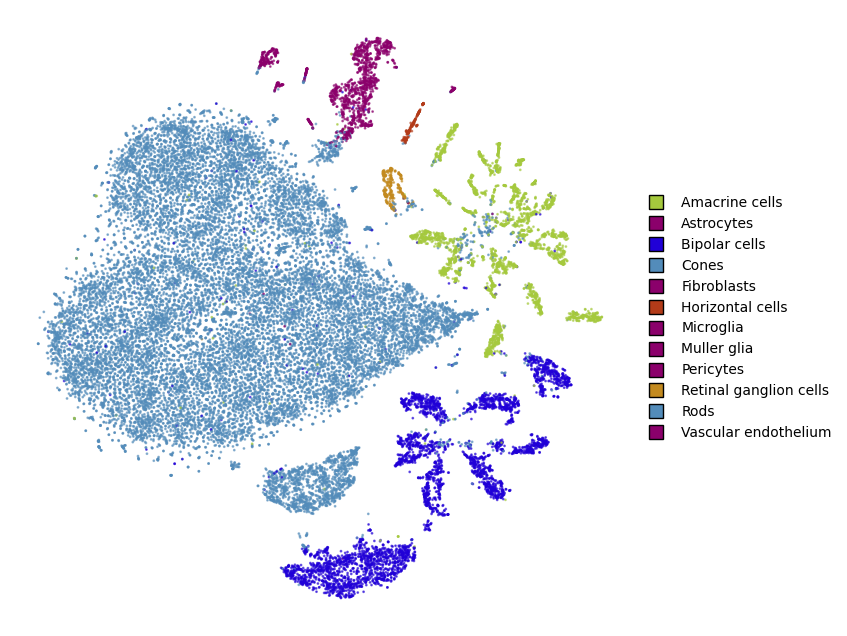

In [19]:
%time embedding_train = tsne.fit(x_train)

utils.plot(embedding_train, y_train, colors=utils.MACOSKO_COLORS)

#### <a id='toc1_1_1_4_'></a>[Transformación](#toc0_)

Actualmente openTSNE es la única librería que permite meter en el `embedding` nuevos puntos. 

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.76 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.05 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 213893.9378, 50 iterations in 0.2370 sec
Iteration  100, KL divergence 212358.2086, 50 iterations in 0.2640 sec
Iteration  150, KL divergence 211368.8011, 50 iterations in 0.2532 sec
Iteration  200, KL divergence 210642.9236, 50 iterations in 0.2411 sec
Iteration  250, KL divergence 210092.0278, 50 iterations in 0.2760 sec
   --> Time elapsed: 1.27 seconds
CPU times: total: 18 s
Wall time: 2.45 s


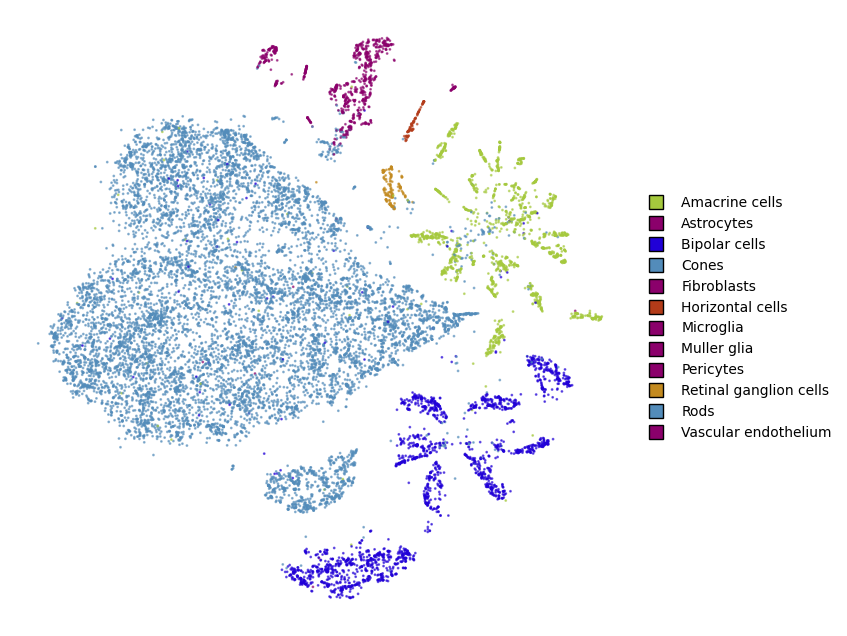

In [20]:
%time embedding_test = embedding_train.transform(x_test)

utils.plot(embedding_test, y_test, colors=utils.MACOSKO_COLORS)


#### <a id='toc1_1_1_5_'></a>[Todo junto](#toc0_)

Superpone los puntos transformados en el `embedding`original. 

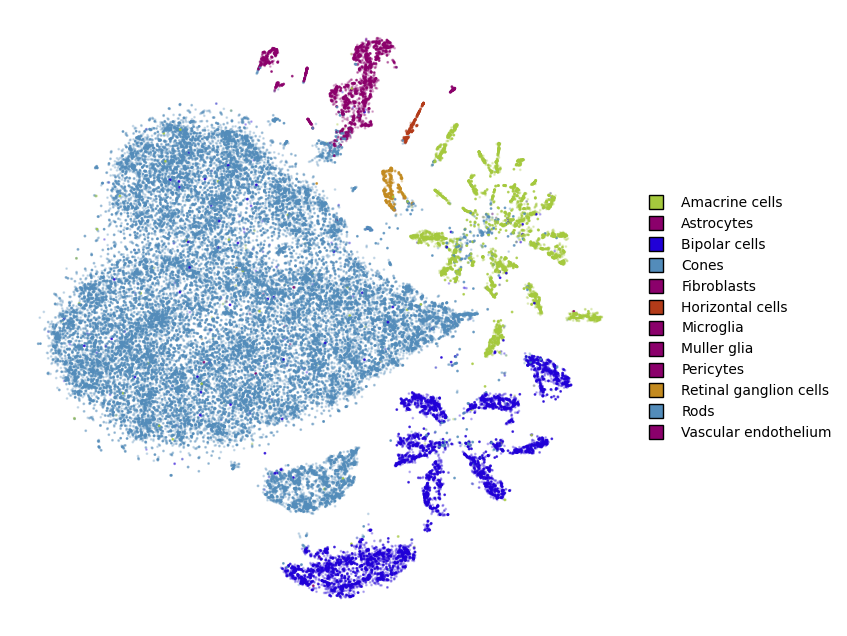

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))
utils.plot(embedding_train, y_train, colors=utils.MACOSKO_COLORS, alpha=0.25, ax=ax)
utils.plot(embedding_test, y_test, colors=utils.MACOSKO_COLORS, alpha=0.75, ax=ax)

## <a id='toc1_2_'></a>[Ejercicios con OpenTSNE](#toc0_)

Aplica el modelo t-SNE al dataset MNIST. 

#### <a id='toc1_2_1_1_'></a>[Load data](#toc0_)
Load MNIST dataset: https://www.kaggle.com/weiouyang/test-dataset/version/1

(60000, 28, 28)
(60000,)


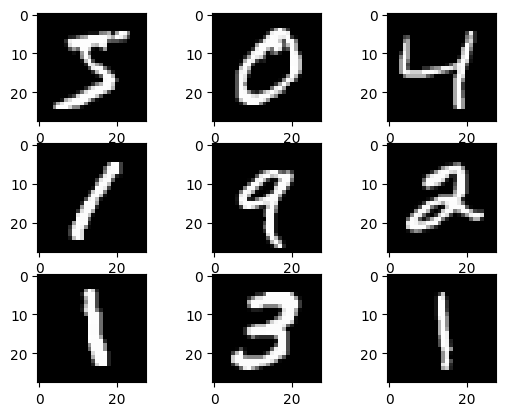

In [24]:
import gzip
import pickle
import sys
import matplotlib.pyplot as plt

f = gzip.open('data/mnist.pkl.gz', 'rb')
if sys.version_info < (3,):
    (X_train, y_train), (X_test, y_test) = pickle.load(f)
else:
    (X_train0, y_train0), (X_test0, y_test0) = pickle.load(f, encoding="bytes")
    
print(X_train0.shape)
print(y_train.shape)

for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train0[i], cmap=plt.get_cmap('gray'))



In [25]:
X_train0=X_train0.reshape(60000,-1)
y_train0 = y_train0.astype(str)

X_test0 = X_test0.reshape(10000,-1)
y_test0 = y_test0.astype(str)
x_train, x_test, y_train, y_test = train_test_split(X_train0, y_train0, test_size=.25, random_state=42)

#### <a id='toc1_2_1_2_'></a>[- Empieza ejecutando la función con los valores por defecto (perplexity = 30, early_exaggeration = 12, initialization='pca')  para un subconjunto de train del 75% de la muestra.](#toc0_)

In [ ]:
#X_train0 = X_train0[:10000]
#y_train = y_train[:10000]
#X_test0 = X_test0[:10000]
#y_test = y_test[:10000]

In [26]:
tsne = TSNE(perplexity = 30, metric = 'euclidean', early_exaggeration = 12,  random_state = 42, n_jobs = -1, verbose = True, initialization = 'pca')

embedding_train_default = tsne.fit(x_train)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=-1, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 14.91 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 1.93 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.63 seconds
===> Running optimization with exaggeration=12.00, lr=3750.00 for 250 iterations...
Iteration   50, KL divergence 5.6614, 50 iterations in 1.4180 sec
Iteration  100, KL divergence 5.5525, 50 iterations in 1.4801 sec
Iteration  150, KL divergence 5.5307, 50 iterations in 1.4489 sec
Iteration  200, KL divergence 5.5215, 50 iterations in 1.4697 sec
Iteration  250, KL divergence 5.5154, 50 iterations in 1.4300 sec
   --> Time elapsed: 7.25 seconds
===> Running optimization with exaggeration

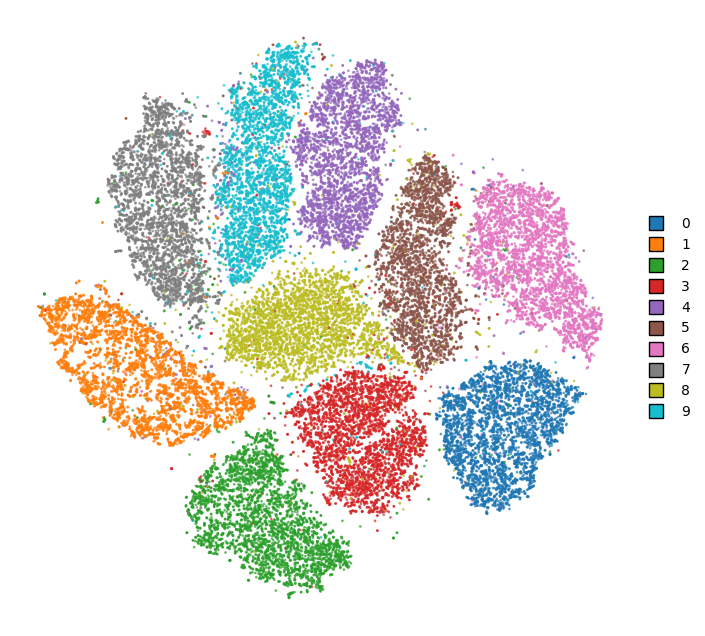

In [27]:
utils.plot(embedding_train_default, y_train)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 1.94 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.12 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 216701.8935, 50 iterations in 0.2660 sec
Iteration  100, KL divergence 214971.9142, 50 iterations in 0.2700 sec
Iteration  150, KL divergence 213923.0646, 50 iterations in 0.2721 sec
Iteration  200, KL divergence 213234.8219, 50 iterations in 0.2690 sec
Iteration  250, KL divergence 212728.6054, 50 iterations in 0.2780 sec
   --> Time elapsed: 1.36 seconds


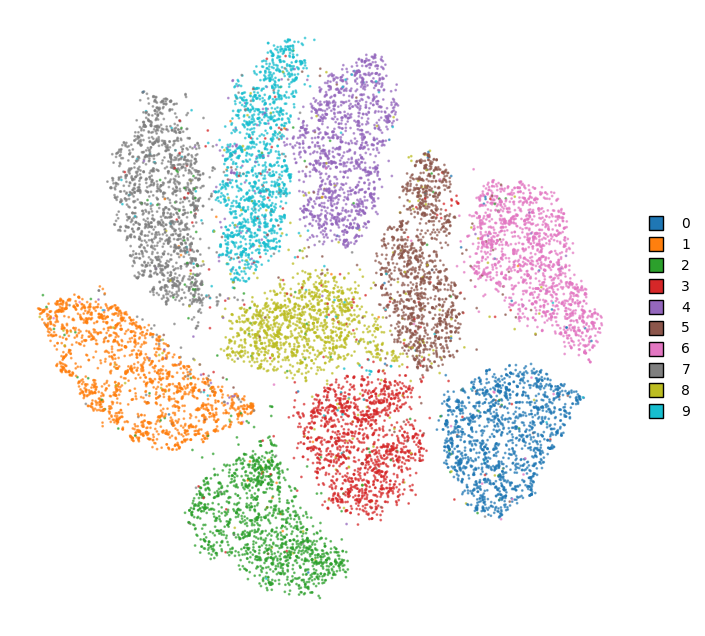

In [28]:
embedding_test_default = embedding_train_default.transform(x_test)
utils.plot(embedding_test_default, y_test)

Podemos dibujar ambas combinadas:

Text(0.5, 1.0, 'perplexity = 30, early_exaggeration = 12')

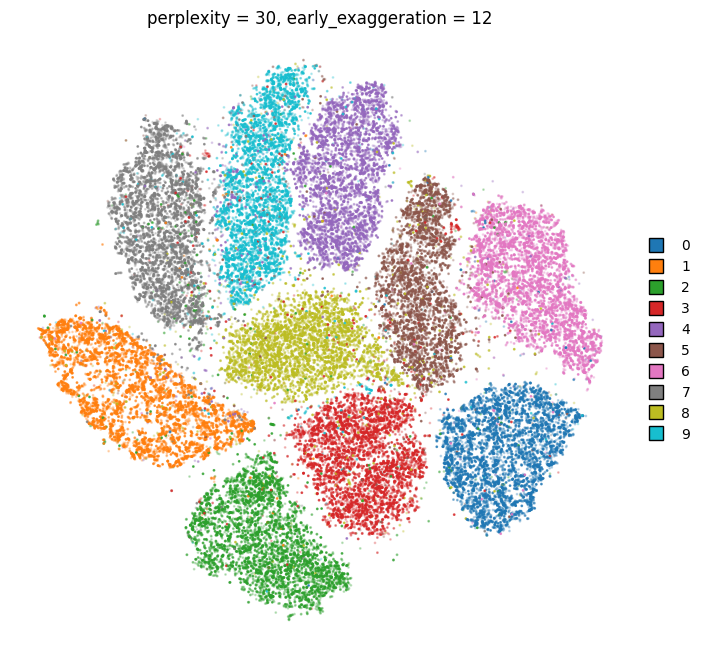

In [41]:
fig, ax = plt.subplots(figsize=(8, 8))
utils.plot(embedding_train_default, y_train, alpha=0.25, ax=ax)
utils.plot(embedding_test_default, y_test, alpha=0.75, ax=ax)
ax.set_title('perplexity = 30, early_exaggeration = 12')

#### <a id='toc1_2_1_3_'></a>[- Ejecuta el modelo sin early_exaggeration (early_exaggeration=1). ¿Qué diferencias observas y a qué se deben?](#toc0_)

In [32]:
tsne2 = TSNE(perplexity = 30, metric = 'euclidean', early_exaggeration = 1,  random_state = 42, n_jobs = 8, verbose = True, initialization = 'pca')

embedding_train_default2 = tsne2.fit(x_train)
embedding_test_default2 = embedding_train_default2.transform(x_test)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=1, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 16.08 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.47 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.63 seconds
===> Running optimization with exaggeration=1.00, lr=45000.00 for 250 iterations...
Iteration   50, KL divergence 3.4339, 50 iterations in 1.4179 sec
Iteration  100, KL divergence 3.1556, 50 iterations in 2.5063 sec
Iteration  150, KL divergence 3.0148, 50 iterations in 3.6378 sec
Iteration  200, KL divergence 2.9265, 50 iterations in 4.9491 sec
Iteration  250, KL divergence 2.8638, 50 iterations in 5.9922 sec
   --> Time elapsed: 18.50 seconds
===> Running optimization with exaggeration=

Text(0.5, 1.0, 'perplexity = 30, early_exaggeration = 12')

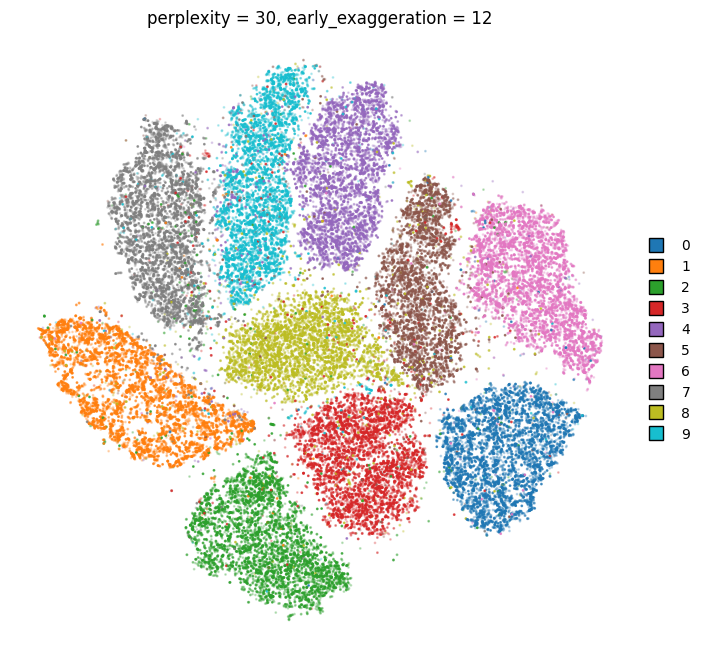

In [42]:
fig, ax = plt.subplots(figsize=(8, 8))
utils.plot(embedding_train_default, y_train, alpha=0.25, ax=ax)
utils.plot(embedding_test_default, y_test, alpha=0.75, ax=ax)
ax.set_title('perplexity = 30, early_exaggeration = 12')

Text(0.5, 1.0, 'perplexity = 30, early_exaggeration = 1')

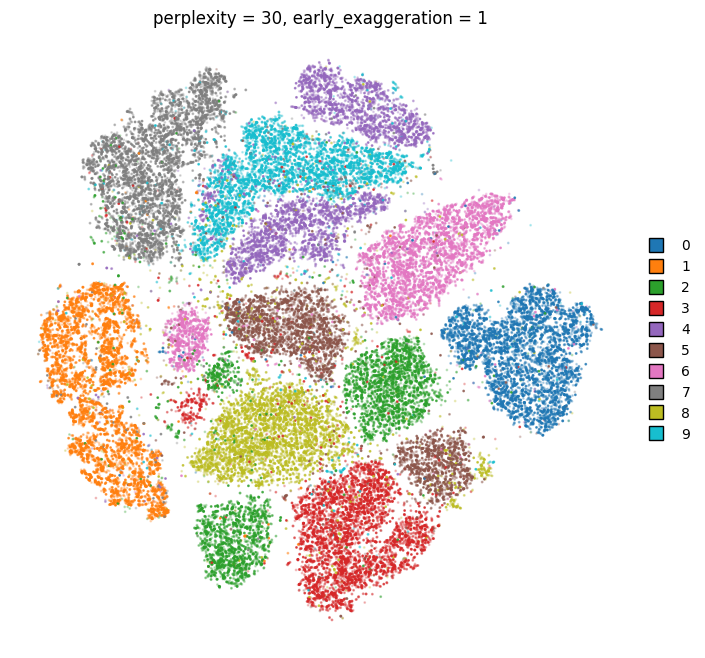

In [43]:
fig, ax = plt.subplots(figsize=(8, 8))
utils.plot(embedding_train_default2, y_train, alpha=0.25, ax=ax)
utils.plot(embedding_test_default2, y_test, alpha=0.75, ax=ax)
ax.set_title('perplexity = 30, early_exaggeration = 1')

In [52]:
import pandas as pd

kl_train_1 = embedding_train_default.kl_divergence
kl_test_1 = embedding_test_default.kl_divergence

kl_train_2 = embedding_train_default2.kl_divergence
kl_test_2 = embedding_test_default2.kl_divergence

df_kl = pd.DataFrame({
    'KL (train)': [kl_train_1, kl_train_2],
    'KL (test)': [kl_test_1, kl_test_2]
}, index=['Embedding 1', 'Embedding 2'])

df_kl

KL (train)      KL (test)
Embedding 1    2.589916  206638.286184
Embedding 2    2.624046  207510.810251

El factor de `early_exaggeration` se utiliza típicamente durante la fase inicial. Este aumenta, básicamente, las fuerzas atractivas entre los puntos y permite que los puntos se muevan más libremente, encontrando más fácilmente los vecinos más cercanos.

El aumento de este valor suele llevar a clusters más separados. Es un poco difícil de discernir visualmente, pero sí que hay algunos indicios de este comportamiento. Vemos por ejemplo que en el caso de `early_exaggeration` = 1 tenemos la clase 2 dividida en varios fragmentos, sin estar toda unida.

#### <a id='toc1_2_1_4_'></a>[- Ejecuta el modelo con los valores por defecto pero cambiando la inicialización a `random`. ¿Qué ocurre? ¿Obtenemos mejores o peores resultados que en el caso anterior? Compara también los tiempos de ejecución y comenta porqué difieren.](#toc0_)

In [46]:
tsne3 = TSNE(perplexity = 30, metric = 'euclidean', early_exaggeration = 12,  random_state = 42, n_jobs = 8, verbose = True, initialization = 'random')

embedding_train_default3 = tsne3.fit(x_train)
embedding_test_default3 = embedding_train_default3.transform(x_test)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, initialization='random', n_jobs=8, random_state=42,
     verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 15.91 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.43 seconds
===> Running optimization with exaggeration=12.00, lr=3750.00 for 250 iterations...
Iteration   50, KL divergence 7.0629, 50 iterations in 1.3290 sec
Iteration  100, KL divergence 5.6295, 50 iterations in 1.3935 sec
Iteration  150, KL divergence 5.5525, 50 iterations in 1.3452 sec
Iteration  200, KL divergence 5.5316, 50 iterations in 1.3288 sec
Iteration  250, KL divergence 5.5247, 50 iterations in 1.4411 sec
   --> Time elapsed: 6.84 seconds
===> Running optimization with exaggeration=1.00, lr=45000.00 for 500 iterations...
Iteration

Text(0.5, 1.0, 'perplexity = 30, early_exaggeration = 12, initialization = pca')

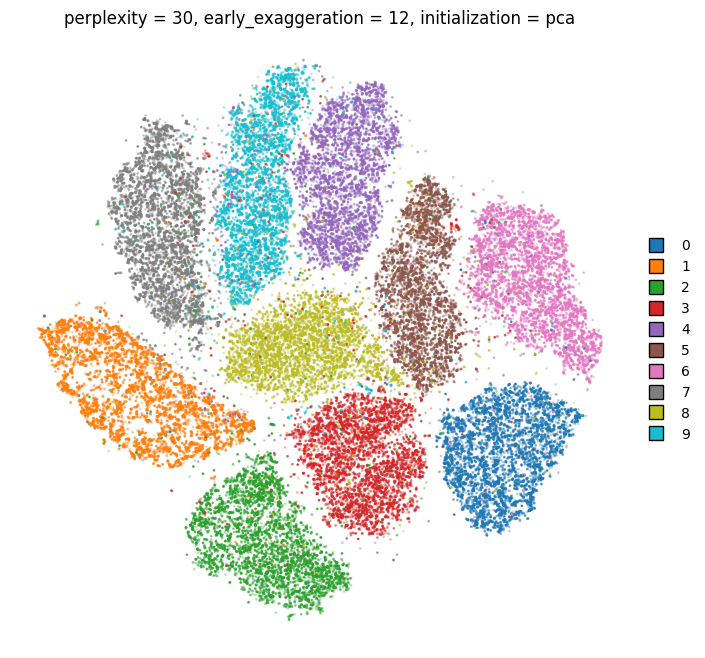

In [49]:
fig, ax = plt.subplots(figsize=(8, 8))
utils.plot(embedding_train_default, y_train, alpha=0.25, ax=ax)
utils.plot(embedding_test_default, y_test, alpha=0.75, ax=ax)
ax.set_title('perplexity = 30, early_exaggeration = 12, initialization = pca')

Text(0.5, 1.0, 'perplexity = 30, early_exaggeration = 1, initialization = random')

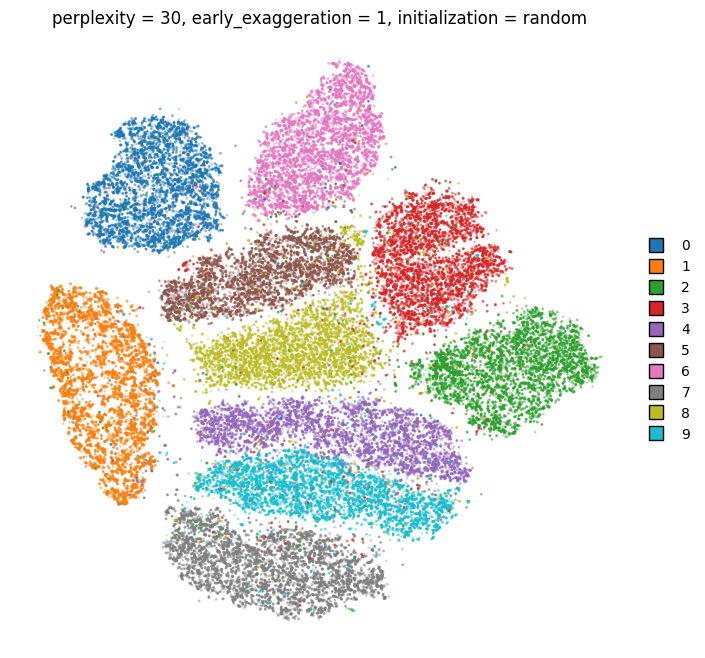

In [48]:
fig, ax = plt.subplots(figsize=(8, 8))
utils.plot(embedding_train_default3, y_train, alpha=0.25, ax=ax)
utils.plot(embedding_test_default3, y_test, alpha=0.75, ax=ax)
ax.set_title('perplexity = 30, early_exaggeration = 1, initialization = random')

In [51]:
import pandas as pd

kl_train_1 = embedding_train_default.kl_divergence
kl_test_1 = embedding_test_default.kl_divergence

kl_train_3 = embedding_train_default3.kl_divergence
kl_test_3 = embedding_test_default3.kl_divergence

df_kl = pd.DataFrame({
    'KL (train)': [kl_train_1, kl_train_3],
    'KL (test)': [kl_test_1, kl_test_3]
}, index=['Embedding 1', 'Embedding 3'])

df_kl

KL (train)      KL (test)
Embedding 1    2.589916  206638.286184
Embedding 3    2.604412  206733.721094

Los resultados en cuestiones de divergencia de Kullback-Leibler son bastante similares, pero se obtiene un mejor resultado para el de inicialización aleatoria. Esto no es nada concluyente, ya que la aleatoriedad es muy fuerte y con solo variar el random_state cambiarían nuestros resultados.

Con el de inicialización `random` tarda ligeramente más, ya que estamos comenzando con una distribución aleatoria de puntos en el espacio de embedding. Esto lleva a una convergencia a la solución diferente en comparación a la inicialización con PCA, donde los puntos iniciales están más agrupados según la estructura de los datos de entrada.

#### <a id='toc1_2_1_5_'></a>[- Ejecuta el modelo con 2 valores muy dispares de perplexity, por ejemplo 1 y 100, (y el resto de valores por defecto) y comenta los resultados.](#toc0_)

In [55]:
tsne4 = TSNE(perplexity = 1, metric = 'euclidean', early_exaggeration = 12,  random_state = 42, n_jobs = 8, verbose = True, 
             initialization = 'pca')

tsne5 = TSNE(perplexity = 100, metric = 'euclidean', early_exaggeration = 12,  random_state = 42, n_jobs = 8, verbose = True, 
             initialization = 'pca')

In [56]:
embedding_train_default4 = tsne4.fit(x_train)
embedding_test_default4 = embedding_train_default4.transform(x_test)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, perplexity=1, random_state=42,
     verbose=True)
--------------------------------------------------------------------------------
===> Finding 3 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 8.20 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.02 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.63 seconds
===> Running optimization with exaggeration=12.00, lr=3750.00 for 250 iterations...
Iteration   50, KL divergence 8.0306, 50 iterations in 1.0812 sec
Iteration  100, KL divergence 7.2541, 50 iterations in 1.0988 sec
Iteration  150, KL divergence 6.8804, 50 iterations in 1.0940 sec
Iteration  200, KL divergence 6.6425, 50 iterations in 1.0825 sec
Iteration  250, KL divergence 6.4701, 50 iterations in 1.0576 sec
   --> Time elapsed: 5.41 seconds
===> Running optimization w

In [57]:
embedding_train_default5 = tsne5.fit(x_train)
embedding_test_default5 = embedding_train_default5.transform(x_test)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, perplexity=100, random_state=42,
     verbose=True)
--------------------------------------------------------------------------------
===> Finding 300 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 26.37 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 1.55 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.63 seconds
===> Running optimization with exaggeration=12.00, lr=3750.00 for 250 iterations...
Iteration   50, KL divergence 4.9143, 50 iterations in 1.9509 sec
Iteration  100, KL divergence 4.9994, 50 iterations in 2.0278 sec
Iteration  150, KL divergence 5.0014, 50 iterations in 1.9024 sec
Iteration  200, KL divergence 5.0013, 50 iterations in 1.9296 sec
Iteration  250, KL divergence 5.0013, 50 iterations in 1.8109 sec
   --> Time elapsed: 9.62 seconds
===> Running optimizat

Text(0.5, 1.0, 'perplexity = 1, early_exaggeration = 12')

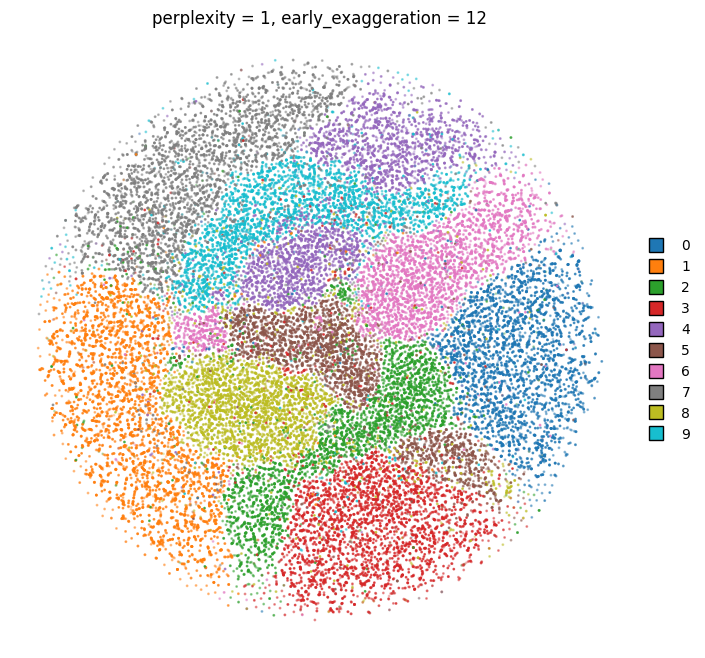

In [58]:
fig, ax = plt.subplots(figsize=(8, 8))
utils.plot(embedding_train_default4, y_train, alpha=0.25, ax=ax)
utils.plot(embedding_test_default4, y_test, alpha=0.75, ax=ax)
ax.set_title('perplexity = 1, early_exaggeration = 12')

Text(0.5, 1.0, 'perplexity = 100, early_exaggeration = 12')

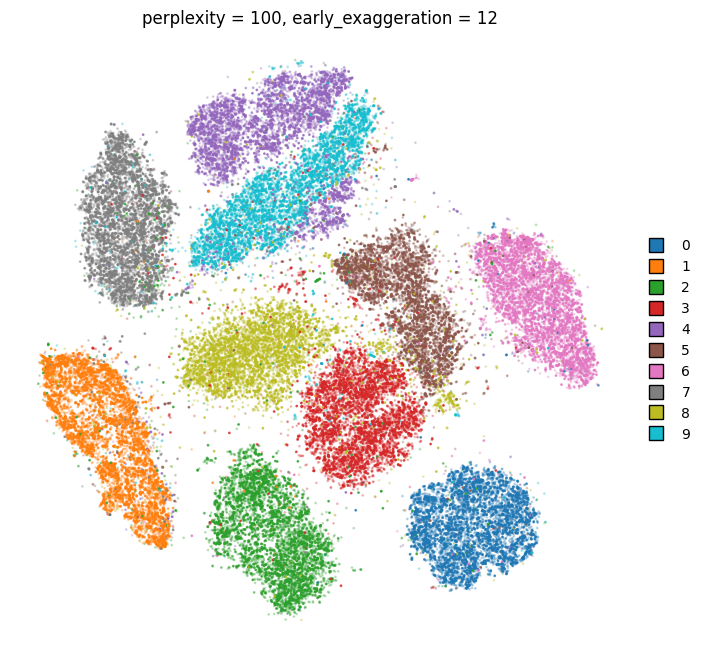

In [59]:
fig, ax = plt.subplots(figsize=(8, 8))
utils.plot(embedding_train_default5, y_train, alpha=0.25, ax=ax)
utils.plot(embedding_test_default5, y_test, alpha=0.75, ax=ax)
ax.set_title('perplexity = 100, early_exaggeration = 12')

Cuando ejecutamos el modelo t-SNE con valores de perplexity muy bajos, como 1, y muy altos, como 100, obtenemos resultados notablemente diferentes debido a cómo afecta la perplexity al proceso de optimización de t-SNE.

- **Perplexity 1:** Con una perplexity tan baja, el modelo no puede capturar adecuadamente la estructura global de los datos. Esto se debe a que la perplexity controla el número de vecinos considerados en el cálculo de las distribuciones de probabilidad. Con una perplexity de 1, solo se consideran los vecinos más cercanos, lo que resulta en una representación extremadamente local de los datos. Esto puede llevar a agrupaciones deficientes y a una interpretación inadecuada de la estructura de los datos en el espacio de menor dimensión.

- **Perplexity 100:** Por el contrario, con una perplexity tan alta, el modelo puede capturar mejor la estructura global de los datos al considerar más vecinos en el cálculo de las distribuciones de probabilidad. Sin embargo, esto puede llevar a una simplificación excesiva de la estructura local de los datos, lo que resulta en una representación donde se pierden las relaciones locales en favor de la estructura global.

En resumen, al usar valores extremos de perplexity como 1 y 100, observamos problemas como la incapacidad para capturar la estructura global de los datos o la pérdida de detalles locales. Es importante ajustar la perplexity de manera adecuada para encontrar un equilibrio entre la representación global y local de los datos.

#### <a id='toc1_2_1_6_'></a>[- De todas las configuraciones de t-SNE probadas en los ejercicios anteriores, escoge la que mejores resultados obtiene y aplica los datos de test al embedding. Representa el dataset entero.](#toc0_)

Text(0.5, 1.0, 'perplexity = 30, early_exaggeration = 12')

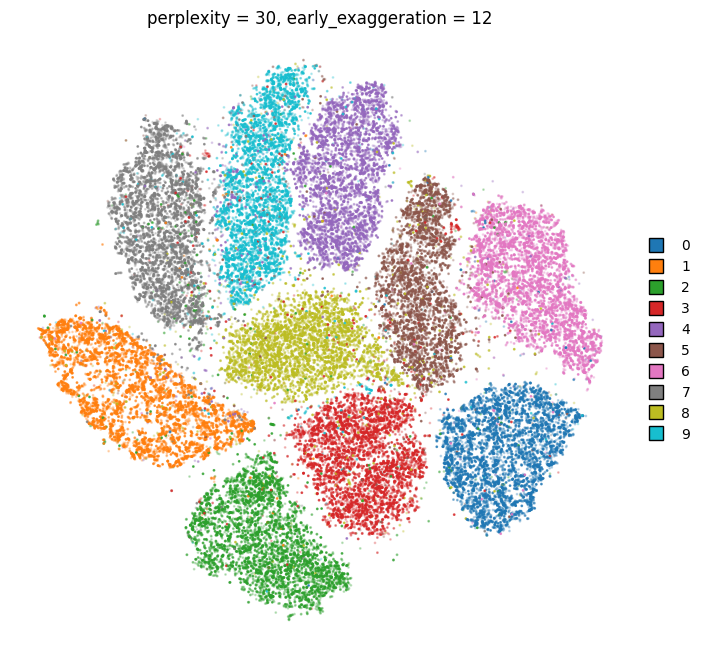

In [60]:
fig, ax = plt.subplots(figsize=(8, 8))
utils.plot(embedding_train_default, y_train, alpha=0.25, ax=ax)
utils.plot(embedding_test_default, y_test, alpha=0.75, ax=ax)
ax.set_title('perplexity = 30, early_exaggeration = 12')

## <a id='toc1_3_'></a>[Ejercicios con TSNE de sklearn](#toc0_)

La idea principal detrás de t-SNE es preservar la estructura local y global de los datos durante la reducción de dimensionalidad. Funciona calculando una distribución de probabilidad conjunta sobre pares de puntos en el espacio original, y una distribución de probabilidad similar en el espacio de menor dimensión. 

Luego, ajusta los puntos en el espacio de menor dimensión para minimizar la divergencia entre estas dos distribuciones de probabilidad, generalmente utilizando la divergencia de Kullback-Leibler.

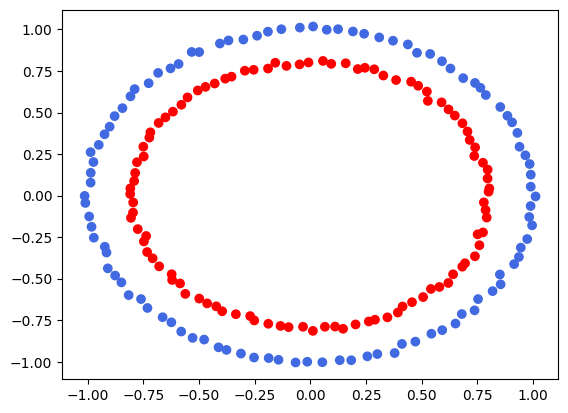

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

colors = ['royalblue','red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

from sklearn.datasets import make_circles
X, y = make_circles(n_samples=200, noise=0.01, random_state = 42)
plt.scatter(X[:,0], X[:,1],c=vectorizer(y))

Para más información de TSNE en sklearn se tiene el enlace siguiente:

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

- `perplexity`: está relacionada con el número de vecinos cercanos que se usan en los algoritmos de manifold learning. Los datasets más grandes suelen requerir un valor mayor. 

- `early_exaggeration`: controla cómo de  ajustados son los grupos naturales en el espacio original en el espacio incrustado y cuánto espacio habrá entre ellos. Valores más grandes indican que hay más lugar entre los grupos naturales en el espacio incrustado.

#### <a id='toc1_3_1_1_'></a>[Ejecuta t-sne de sklearn con el dataset de los círculos variando la perplexity (valores 5, 30, 100).](#toc0_)

In [ ]:
def visualize_tsne(X, y, perplexities):
    plt.figure(figsize=(18, 6))
    num_perplexities = len(perplexities)
    
    kl_divergences = {}  # Diccionario para almacenar las divergencias KL
    
    for i, perplexity in enumerate(perplexities, start=1):
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
        X_tsne = tsne.fit_transform(X)
        
        plt.subplot(1, num_perplexities, i)
        unique_classes = np.unique(y)
        for cls in unique_classes:
            indices = np.where(y == cls)
            plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label=f'Class {cls}', alpha=0.8)
        
        plt.title(f"Perplexity = {perplexity}")
        plt.xlabel("t-SNE Component 1")
        plt.ylabel("t-SNE Component 2")
        plt.legend()
        plt.grid(True)
        
        kl_divergences[perplexity] = tsne.kl_divergence_
    
    plt.tight_layout()
    plt.show()
    
    return kl_divergences


c:\Users\jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization

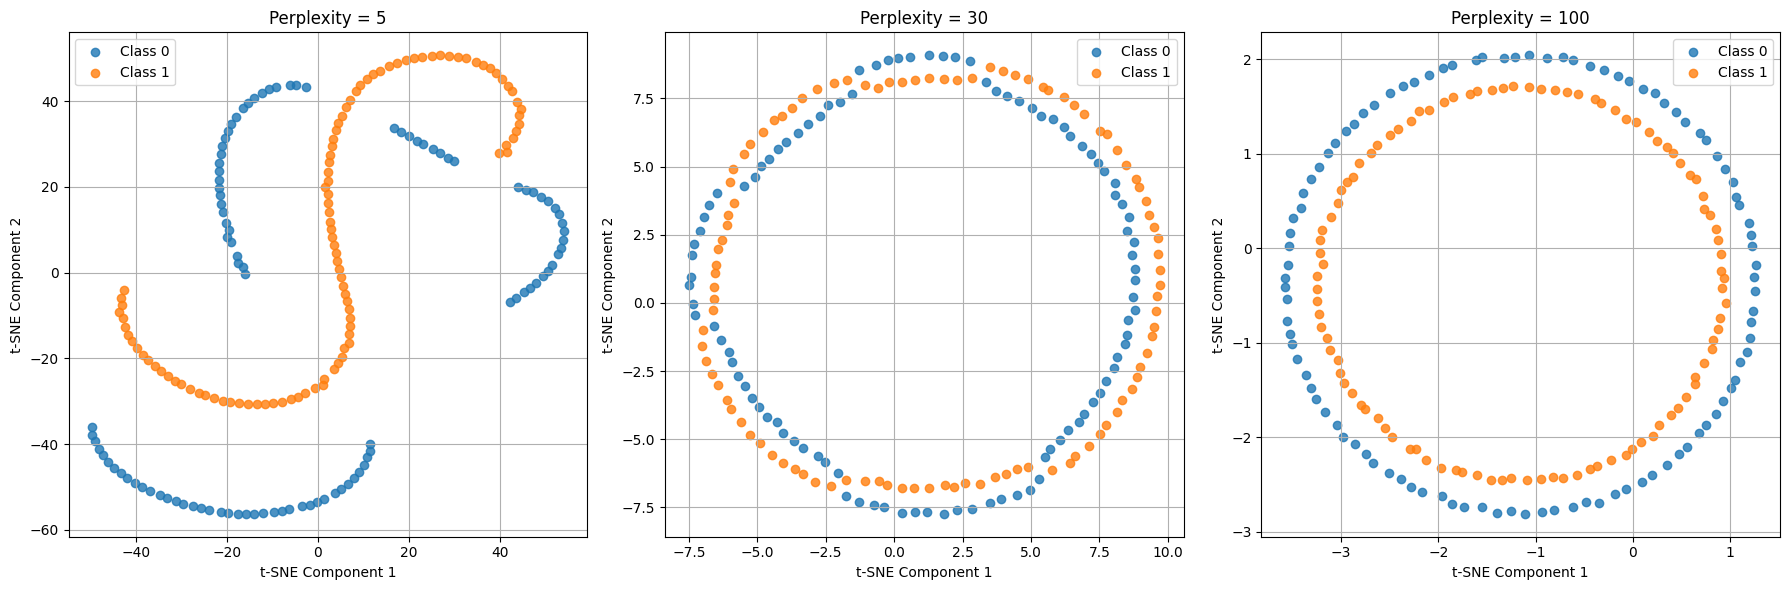

In [ ]:
perplexities = [5, 30, 100]
kl_divergences = visualize_tsne(X, y, perplexities)

Vemos que con un valor de `perplexity` bajo las cosas no parecen ir bien y el aspecto de círculo desaparece completamente.

Con un `perplexity` de 30 vemos en alguna zona cosas extrañas, mientras que con un valor de `perplexity` de 100 todo parece estar perfectamente.

#### <a id='toc1_3_1_2_'></a>[¿Que KL obtienes en cada caso?](#toc0_)

In [ ]:
print("KL Divergences:", kl_divergences)

KL Divergences: {5: 0.4045565128326416, 30: 0.19363267719745636, 100: 0.07120548188686371}


Vemos cómo aumentando el `perplexity` conseguimos divergencias de Kullback-Leibler cada vez menores, indicando que la discrepancia entre la distribución de probabilidad de los datos en el espacio original y la de estos en el reducido va disminuyendo.

#### <a id='toc1_3_1_3_'></a>[Compara los tiempos de ejecución de Barnes-Hut con el método exacto. Utiliza el valor de perplexity que mejor resultado haya obtenido según el ejercicio anterior.](#toc0_)

In [ ]:
import time

def run_tsne(X, perplexity, method):
    start_time = time.time()
    tsne = TSNE(n_components = 2, perplexity = perplexity, method = method, random_state = 42)
    X_tsne = tsne.fit_transform(X)
    
    end_time = time.time()
    execution_time = end_time - start_time
    return X_tsne, execution_time

perplexity = 100

# Método de Barnes-Hut
X_tsne_bh, execution_time_bh = run_tsne(X, perplexity, method = 'barnes_hut')

# Método exacto
X_tsne_exact, execution_time_exact = run_tsne(X, perplexity, method = 'exact')

print(f"Tiempo de ejecución usando Barnes-Hut: {execution_time_bh} segundos")
print(f"Tiempo de ejecución usando método exacto: {execution_time_exact} segundos")


c:\Users\jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Tiempo de ejecución usando Barnes-Hut: 0.28653502464294434 segundos
Tiempo de ejecución usando método exacto: 0.4057042598724365 segundos


Vemos como con el método de Barnes-Hut el tiempo requerido en el cálculo es algo inferior.

La idea principal tras este es que, en lugar de calcular la interacción de cada punto con todos los demás en el espacio de alta dimensión, aproximamos la influencia de grupos de puntos distantes usando su centroide. El espacio se divide en "celdas", por lo que en lugar de calcular todas las similitudes se calculan por esas "celdas".